In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initial Exploration of Data

In [35]:
diabetes_data=pd.read_csv("/Users/asadejaz/Downloads/diabetes_dataset_with_notes 2.csv")
diabetes_data.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,clinical_notes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,"Overweight, advised dietary and exercise modif..."
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Healthy BMI range.
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,"Young patient, generally lower risk but needs ..."
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,"Overweight, advised dietary and exercise modif..."
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,"Healthy BMI range. High HbA1c level, indicativ..."


In [36]:
diabetes_data.dtypes

year                      int64
gender                   object
age                     float64
location                 object
race:AfricanAmerican      int64
race:Asian                int64
race:Caucasian            int64
race:Hispanic             int64
race:Other                int64
hypertension              int64
heart_disease             int64
smoking_history          object
bmi                     float64
hbA1c_level             float64
blood_glucose_level       int64
diabetes                  int64
clinical_notes           object
dtype: object

<Axes: xlabel='gender', ylabel='Count'>

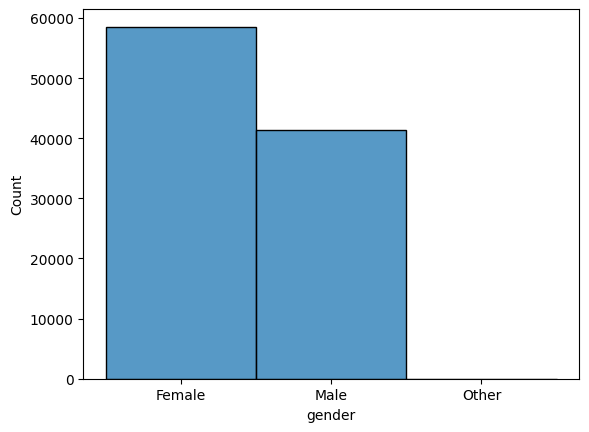

In [52]:
sns.histplot(data=diabetes_data["gender"])

In [53]:
diabetes_data["gender"].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

<Axes: xlabel='smoking_history', ylabel='Count'>

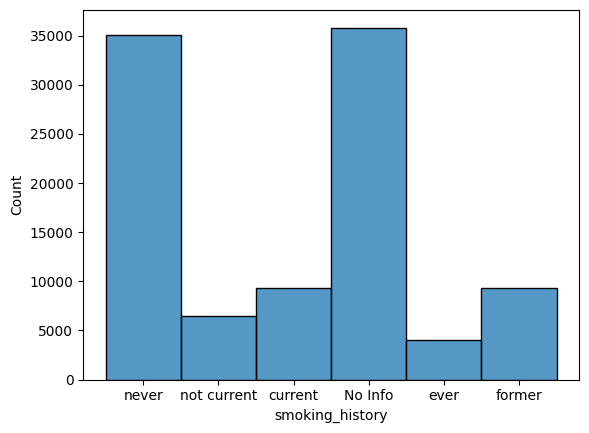

In [54]:
sns.histplot(data=diabetes_data["smoking_history"])

# Cleaning Data

In [37]:
diabetes_data=diabetes_data.drop(["location", "year", "clinical_notes"], axis=1)
diabetes_data

,gender,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,Female,32.0,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,Female,29.0,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,Male,18.0,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,Male,41.0,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,Female,52.0,1,0,0,0,0,0,0,never,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Female,33.0,0,0,0,0,1,0,0,never,21.21,6.5,90,0
99996,Female,80.0,0,1,0,0,0,0,0,No Info,36.66,5.7,100,0
99997,Male,46.0,0,1,0,0,0,0,0,ever,36.12,6.2,158,0
99998,Female,51.0,1,0,0,0,0,0,0,not current,29.29,6.0,155,0


In [38]:
diabetes_data.isnull().sum()

gender                  0
age                     0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64

# Feature Engineering

In [45]:
diabetes_data["bmi_category"]=diabetes_data["bmi"].apply(
    lambda x: "Underweight" if x<18.5 else "Normal Weight" if x<25 else "Over Weight"if x<30 else "Obesity")

In [46]:
diabetes_data.head()

,gender,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,bmi_category
0,Female,32.0,0,0,0,0,1,0,0,never,27.32,5.0,100,0,Over Weight
1,Female,29.0,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Normal Weight
2,Male,18.0,0,0,0,0,1,0,0,never,23.76,4.8,160,0,Normal Weight
3,Male,41.0,0,0,1,0,0,0,0,never,27.32,4.0,159,0,Over Weight
4,Female,52.0,1,0,0,0,0,0,0,never,23.75,6.5,90,0,Normal Weight


In [ ]:
diabetes_data=pd.get_dummies(diabetes_data["bmi_category"]).join(diabetes_data)

In [ ]:
diabetes_data["Normal Weight"]=diabetes_data["Normal Weight"].astype(int)
diabetes_data["Over Weight"]=diabetes_data["Over Weight"].astype(int)
diabetes_data["Underweight"]=diabetes_data["Underweight"].astype(int)
diabetes_data["Obesity"]=diabetes_data["Obesity"].astype(int)

In [ ]:
diabetes_data=diabetes_data.drop("bmi_category", axis=1)

In [51]:
diabetes_data.head()

,Normal Weight,Obesity,Over Weight,Underweight,gender,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,0,0,1,0,Female,32.0,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,1,0,0,0,Female,29.0,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,1,0,0,0,Male,18.0,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,0,0,1,0,Male,41.0,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,1,0,0,0,Female,52.0,1,0,0,0,0,0,0,never,23.75,6.5,90,0


# Getting Data Ready For Modelling 

In [ ]:
diabetes_data["gender"]=diabetes_data["gender"].replace({"Male":1, "Female":0, "Other":0})

In [ ]:
diabetes_data=pd.get_dummies(diabetes_data["smoking_history"]).join(diabetes_data)

In [ ]:
diabetes_data=diabetes_data.drop("smoking_history", axis=1)

In [63]:
diabetes_data["No Info"]=diabetes_data["No Info"].astype(int)
diabetes_data["current"]=diabetes_data["current"].astype(int)
diabetes_data["ever"]=diabetes_data["ever"].astype(int)
diabetes_data["former"]=diabetes_data["former"].astype(int)
diabetes_data["never"]=diabetes_data["never"].astype(int)
diabetes_data["not current"]=diabetes_data["not current"].astype(int)

In [64]:
diabetes_data.head()

,No Info,current,ever,former,never,not current,Normal Weight,Obesity,Over Weight,Underweight,...,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,27.32,5.0,100,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,19.95,5.0,90,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,23.76,4.8,160,0
3,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,27.32,4.0,159,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,23.75,6.5,90,0


In [66]:
df=diabetes_data.copy()

# Predictive Modelling 

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [69]:
x=df.drop("diabetes", axis=1) 
y=df["diabetes"]
X_train, X_test, y_train, y_test=train_test_split(x, y, random_state=42, test_size=0.2)
model=DecisionTreeClassifier()     ##Using Default Parameters
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9503

In [70]:
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
y_pred=model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0497
R-squared: 0.3619982881143201


# Hyperparameter Tuning

In [76]:
from sklearn.model_selection import GridSearchCV
param_grid={
    "criterion":["gini", "entropy"],
    "max_depth":[10,50,100,None], 
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,5]
}
grid_search=GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [77]:
model_tuned=DecisionTreeClassifier(
    criterion="entropy", max_depth=10, min_samples_leaf=2, min_samples_split=2)
model_tuned.fit(X_train, y_train)
model_tuned.score(X_test, y_test)

0.97155

In [80]:
y_pred_tuned=model_tuned.predict(X_test)
mse_tuned=mean_squared_error(y_test, y_pred_tuned)
r2_tuned=r2_score(y_test, y_pred_tuned)
print(f"Mean Squared Error:{mse_tuned}")
print(f"R-Squared: {r2_tuned}")

Mean Squared Error:0.02845
R-Squared: 0.634785740379324


## Model Is performing better after Tuning